In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle('data.pkl')
data

,ID,Query,Time,Rank,URL,Domain,Hour,DidClick
0,479,family guy,2006-03-01 16:01:20,NaN,NaN,NaN,16,False
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN,NaN,14,False
2,479,family guy movie references,2006-03-03 22:37:46,1.0,http://www.familyguyfiles.com,familyguyfiles,22,True
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,http://movieweb.com,movieweb,22,True
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,http://www.imdb.com,imdb,22,True
...,...,...,...,...,...,...,...,...
3614501,24969423,my space. com,2006-05-31 19:03:32,2.0,http://music.myspace.com,myspace,19,True
3614502,24969423,my space.com,2006-05-31 19:12:00,NaN,NaN,NaN,19,False
3614503,24969423,my space.com 3131560415,2006-05-31 19:12:25,NaN,NaN,NaN,19,False
3614504,24969423,jennifer craford my space.com,2006-05-31 19:15:02,NaN,NaN,NaN,19,False


It will be easier to cluster users if data is converted to numerical form.

For now, only consider users that 'used' the platform, by discarding users who never ever clicked on a result.

In [3]:
userids = np.unique(data[pd.notnull(data['URL'])]['ID'])
len(userids)

52330

With over 50,000 users there are too many to analyse in a reasonable time. Luckily, a representative sample should be reasonable when developing the model. Normally we should do some tests to make sure that the sample is representative of the population, but since we're short on time we're just going to sample randomly for now.

If this is a search engine and we're trying to understand how to better serve our users, then we want to give them the best results for a given search. Therefore it would be good to identify what different characteristics users who are successful in their search have, compared to those who are not.

Ultimately, a user could be considered "successful" if they have a high click ratio. Therefore `DidClick` is a key metric.

Are there key characteristics of the users that lead to high click ratio? This would help us understand what we need to do in order to move users from "less successful" to "successful".

We can easily get access to the length of the query and the rank of the click. One could imagine that these will be important for determining whether a search is successful or not. It has already been seen that different sites are visited at different times of the day, suggesting that there is a hour-dependence to the nature of the queries, so it's possible that this helps cluster users. Therefore, `Hour` could be considered. Finally, the `number of queries` that the user makes overall could be indicative of success; more queries either indicates a frequent (happy) user or possibly a frustrated user.

Therefore, all these elements will be included in the clustering analysis, with the `DidClick` ratio as the target metric to understand if users can be characterised by their success.

In [4]:
data['Length'] = data['Query'].map(lambda x: len(x.split()))
data

,ID,Query,Time,Rank,URL,Domain,Hour,DidClick,Length
0,479,family guy,2006-03-01 16:01:20,NaN,NaN,NaN,16,False,2
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN,NaN,14,False,3
2,479,family guy movie references,2006-03-03 22:37:46,1.0,http://www.familyguyfiles.com,familyguyfiles,22,True,4
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,http://movieweb.com,movieweb,22,True,6
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,http://www.imdb.com,imdb,22,True,6
...,...,...,...,...,...,...,...,...,...
3614501,24969423,my space. com,2006-05-31 19:03:32,2.0,http://music.myspace.com,myspace,19,True,3
3614502,24969423,my space.com,2006-05-31 19:12:00,NaN,NaN,NaN,19,False,2
3614503,24969423,my space.com 3131560415,2006-05-31 19:12:25,NaN,NaN,NaN,19,False,3
3614504,24969423,jennifer craford my space.com,2006-05-31 19:15:02,NaN,NaN,NaN,19,False,4


In [5]:
np.random.seed = 0
userids = np.sort(np.random.choice(userids, 1000))

In [6]:
nqueries = []
avhour = []
avdidclick = []
avqlength = []
avrank = []

for id in userids:
    data_id = data[data['ID'] == id]
    nqueries.append(len(data_id))
    avhour.append(data_id['Hour'].mean())
    avdidclick.append(data_id['DidClick'].mean())
    avqlength.append(data_id['Length'].mean())
    avrank.append(data_id['Rank'].mean())

In [7]:
data_user = pd.DataFrame({
    'Queries': nqueries,
    'Hour': avhour,
    'Success': avdidclick,
    'Length': avqlength,
    'Rank': avrank,
    },
    index = userids
    )
data_user

,Queries,Hour,Success,Length,Rank
28495,269,15.386617,0.505576,3.249071,3.852941
66674,417,17.597122,0.757794,5.371703,10.750000
88575,322,15.046584,0.583851,2.363354,2.643617
90662,27,15.333333,0.407407,2.000000,1.181818
110786,66,17.681818,0.757576,1.090909,1.380000
...,...,...,...,...,...
24881102,3,18.000000,0.333333,2.000000,1.000000
24887358,3,19.333333,0.666667,1.000000,1.000000
24896608,19,18.052632,0.368421,1.105263,2.285714
24903847,3,23.000000,0.666667,2.333333,1.000000


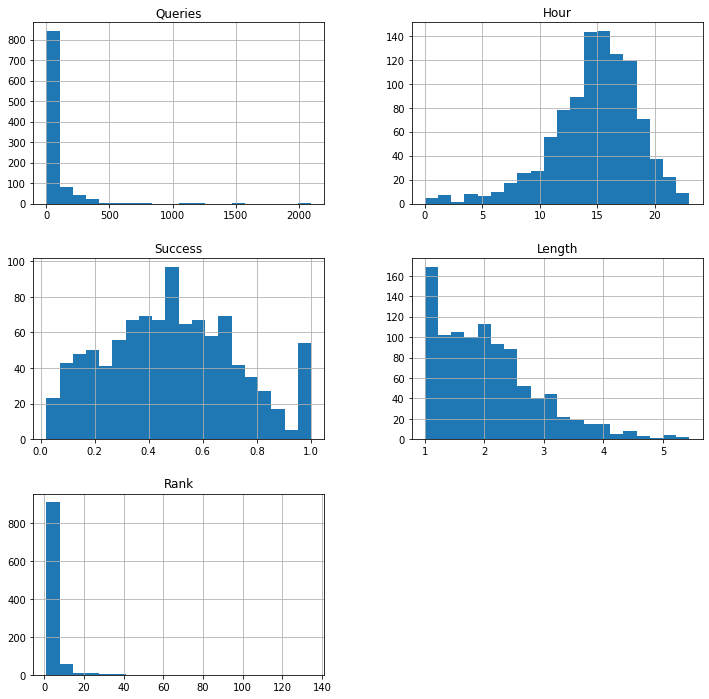

In [8]:
data_user.hist(figsize=(12,12),bins=20);

Much of the data is strongly skewed to the left so it's going to be easier to achieve clustering if we use the log of the data.

In [9]:
data_user[['LogQueries','LogLength','LogRank']] = np.log10(data_user[['Queries','Length','Rank']])
data_user

,Queries,Hour,Success,Length,Rank,LogQueries,LogLength,LogRank
28495,269,15.386617,0.505576,3.249071,3.852941,2.429752,0.511759,0.585792
66674,417,17.597122,0.757794,5.371703,10.750000,2.620136,0.730112,1.031408
88575,322,15.046584,0.583851,2.363354,2.643617,2.507856,0.373529,0.422199
90662,27,15.333333,0.407407,2.000000,1.181818,1.431364,0.301030,0.072551
110786,66,17.681818,0.757576,1.090909,1.380000,1.819544,0.037789,0.139879
...,...,...,...,...,...,...,...,...
24881102,3,18.000000,0.333333,2.000000,1.000000,0.477121,0.301030,0.000000
24887358,3,19.333333,0.666667,1.000000,1.000000,0.477121,0.000000,0.000000
24896608,19,18.052632,0.368421,1.105263,2.285714,1.278754,0.043466,0.359022
24903847,3,23.000000,0.666667,2.333333,1.000000,0.477121,0.367977,0.000000


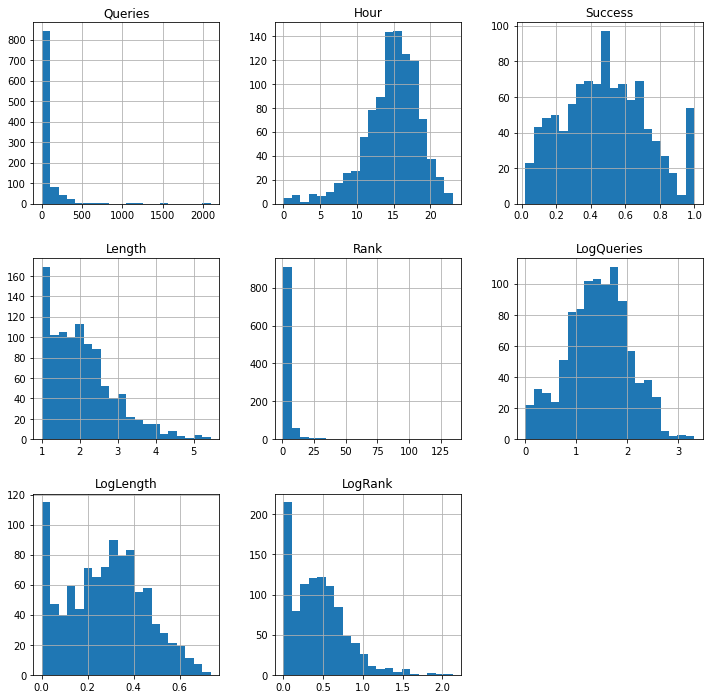

In [10]:
data_user.hist(figsize=(12,12),bins=20);

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(data_user.drop(columns=['Queries','Length','Rank','Success']))
data_user_ss = pd.DataFrame(
    ss.transform(data_user.drop(columns=['Queries','Length','Rank','Success'])),
    index = data_user.index,
    columns = data_user.drop(columns=['Queries','Length','Rank','Success']).columns
)
data_user_ss

,Hour,LogQueries,LogLength,LogRank
28495,0.173823,1.646163,1.361009,0.451333
66674,0.767649,1.959213,2.630118,1.747949
88575,0.082477,1.774590,0.557587,-0.024678
90662,0.159509,0.004505,0.136210,-1.042053
110786,0.790401,0.642793,-1.393801,-0.846147
...,...,...,...,...
24881102,0.875877,-1.564564,0.136210,-1.253155
24887358,1.234061,-1.564564,-1.613435,-1.253155
24896608,0.890016,-0.246434,-1.360804,-0.208504
24903847,2.219067,-1.564564,0.525318,-1.253155


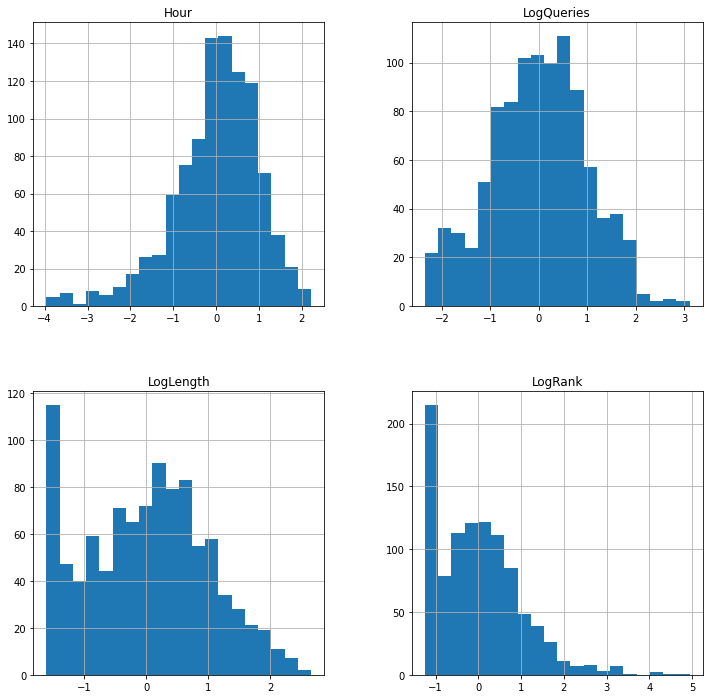

In [12]:
data_user_ss.hist(figsize=(12,12),bins=20);

The above graph shows the standardised values for the features we want to use.

<AxesSubplot:>

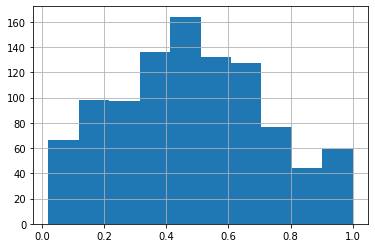

In [13]:
data_user['Success'].hist()

The above graph shows the distribution of the target metric.

In [14]:
data_user['CatSuccess'] = pd.cut(data_user['Success'], 3).map(lambda x: int(x.mid*10)/10)
cats = np.unique(data_user['CatSuccess'])
cats

array([0.1, 0.5, 0.8])

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcomps = pca.fit_transform(data_user_ss)

pcomps_df = pd.DataFrame(data=pcomps, columns=['PC1','PC2'])
pcomps_df['CatSuccess'] = data_user['CatSuccess'].values
pcomps_df

,PC1,PC2,CatSuccess
0,1.929799,-0.540015,0.5
1,3.500588,-1.204705,0.8
2,1.294547,-0.458275,0.5
3,-0.571723,-0.178190,0.5
4,-0.993382,-0.872122,0.8
...,...,...,...
995,-1.690393,-0.565125,0.1
996,-2.680542,-0.859050,0.5
997,-1.114605,-0.780464,0.5
998,-1.650410,-1.892218,0.5


In [16]:
pca.explained_variance_ratio_

array([0.44485656, 0.24971732])

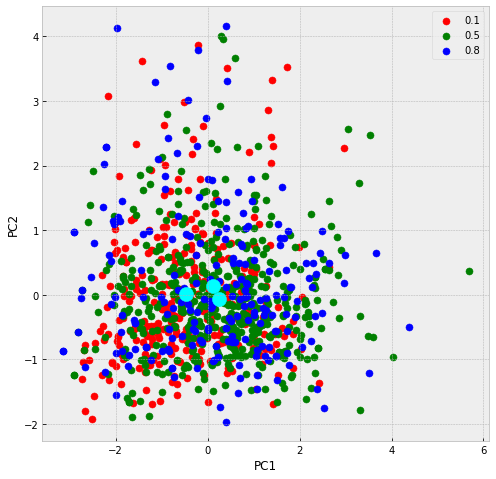

In [17]:
colours = ['r','g','b']

with plt.style.context('bmh'):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    for isuccess, icolour in zip(cats,colours):
        ax.scatter(
            pcomps_df[pcomps_df['CatSuccess'] == isuccess]['PC1'],
            pcomps_df[pcomps_df['CatSuccess'] == isuccess]['PC2'],
            c = icolour,
            s = 50,
        )

    for isuccess in cats:
        ax.scatter(
            pcomps_df[pcomps_df['CatSuccess'] == isuccess]['PC1'].mean(),
            pcomps_df[pcomps_df['CatSuccess'] == isuccess]['PC2'].mean(),
            c='cyan',
            s=200
        )

    ax.legend(cats)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

The above figure shows the distribution across principles axes for those who are least successful (red), most successful (blue) and inbetween (green). The average for each group is indicated by a cyan dot. The averages are clustered together showing how these features do not lend themselves to natural clustering. It would be interesting to test if higher dimensions help, although with only a few features we have limited space for exploration here.

In [18]:
pca = PCA(n_components=4)
pcomps = pca.fit_transform(data_user_ss)
pca.explained_variance_ratio_

array([0.44485656, 0.24971732, 0.17055541, 0.13487071])

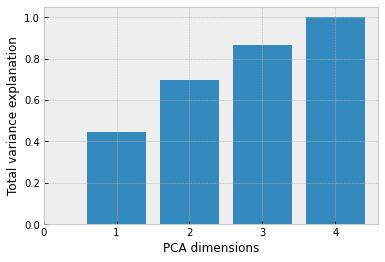

In [19]:
with plt.style.context('bmh'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.bar(np.arange(1,5),np.cumsum(pca.explained_variance_ratio_))
    ax.set_xticks(range(5))
    ax.set_xlabel('PCA dimensions')
    ax.set_ylabel('Total variance explanation')

The intention was next to perform K-Means analysis, but this is clearly of limited value in this situation.

In [20]:
pcomps_df = pd.DataFrame(data=pcomps, columns=[f'PC{i}' for i in range(1,5)])

inertia_list = []
from sklearn.cluster import KMeans
for ik in range(1,5):
    model_km = KMeans(n_clusters=ik)
    model_km.fit(pcomps_df)
    inertia_list.append(model_km.inertia_)

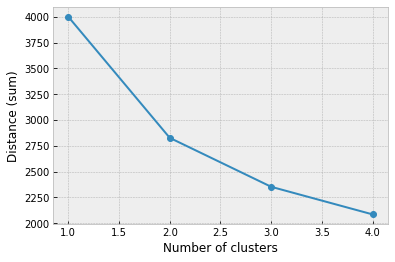

In [21]:
with plt.style.context('bmh'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(1,5),inertia_list,'-o')
    ax.set_ylabel('Distance (sum)')
    ax.set_xlabel('Number of clusters')

There are two issues here:

1. There needs to be better feature engineering. In particular, understanding the relationship between queries that result in success and queries that don't could be explored more. In particular, some better engineering around the contents of the text of the queries beyond simply their length would probably help. What text leads to success? Does the use of dictionary words or domain names help? And so on.
2. There are a range of clustering algorithms in existance (https://scikit-learn.org/stable/modules/clustering.html). I standardised the data to be fairly well distributed so the K-Means method could be reasonable, but further feature engineering might require other algorithms to be considered.

In [22]:
pd.to_pickle(data_user, 'user.pkl')